In [1]:
import sys
sys.path.insert(0,'/home/marc.penuliar/bilby') 
import bilby
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

No version information file '.version' found


In [2]:
result_1 = bilby.result.read_in_result(filename='lambdatilde_deltalambdatilde/outdir/bns_example_result.json') #Bilby_Example_Code_Carls_Import 
result_2 = bilby.result.read_in_result(filename='lambdaSymm_lambdaASymm/outdir/bns_example_result.json') #lambdaSymm_lambdaASymm
result_3 = bilby.result.read_in_result(filename='binary_love_Symm/outdir/bns_example_result.json') #Binary_love_Symm

results_4 = bilby.result.read_in_result(filename='Original_Example/outdir/bns_example_result.json') #Orignial_Bilby_Example_Code

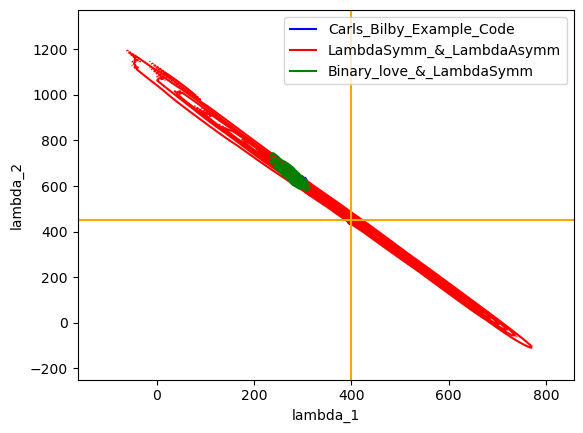

In [3]:
sns.kdeplot( x=result_1.posterior['lambda_1'], y=result_1.posterior['lambda_2'],color = 'blue', label='Carls_Bilby_Example_Code')
sns.kdeplot( x=result_2.posterior['lambda_1'], y=result_2.posterior['lambda_2'],color = 'r', label='LambdaSymm_&_LambdaAsymm')
sns.kdeplot( x=result_3.posterior['lambda_1'], y=result_3.posterior['lambda_2'],color = 'green', label='Binary_love_&_LambdaSymm')
# sns.kdeplot( x=results_4.posterior['lambda_1'], y=results_4.posterior['lambda_2'],color = 'purple', label='Orignial_Bilby_Example_Code')

#lambda 2 y
plt.axhline(y=result_1.injection_parameters['lambda_2'], color="orange", linestyle="-")
#lambda 2 x
plt.axvline(x= result_1.injection_parameters['lambda_1'], color="orange")
#Add the point
plt.scatter(result_1.injection_parameters['lambda_1'], result_1.injection_parameters['lambda_2'],color = 'black')

plt.legend()
plt.show()

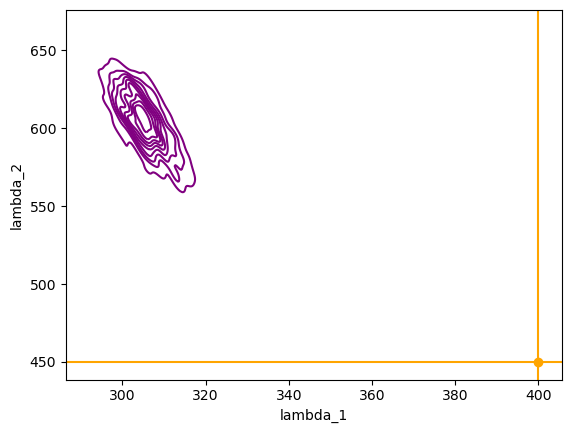

In [4]:
sns.kdeplot( x=results_4.posterior['lambda_1'], y=results_4.posterior['lambda_2'],color = 'purple', label='Orignial_Bilby_Example_Code')
# plt.axhline(y=600, color="orange", linestyle="-")
# plt.axvline(x= 300, color="orange")
# plt.scatter(300, 600,color = 'red')

#lambda 2 y
plt.axhline(y=result_1.injection_parameters['lambda_2'], color="orange", linestyle="-")
#lambda 2 x
plt.axvline(x= result_1.injection_parameters['lambda_1'], color="orange")
#Add the point
plt.scatter(result_1.injection_parameters['lambda_1'], result_1.injection_parameters['lambda_2'],color = 'orange')



In [5]:
print(result_1.injection_parameters['lambda_1']) 

399.99999999999994


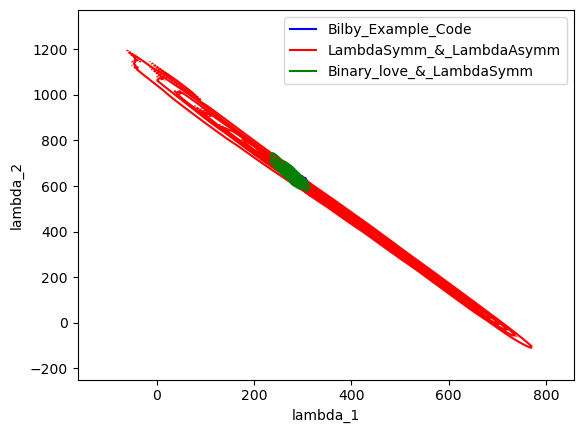

In [6]:
sns.kdeplot( x=result_1.posterior['lambda_1'], y=result_1.posterior['lambda_2'],color = 'blue', label='Bilby_Example_Code')
sns.kdeplot( x=result_2.posterior['lambda_1'], y=result_2.posterior['lambda_2'],color = 'r', label='LambdaSymm_&_LambdaAsymm')
sns.kdeplot( x=result_3.posterior['lambda_1'], y=result_3.posterior['lambda_2'],color = 'green', label='Binary_love_&_LambdaSymm')
plt.legend()
plt.show()

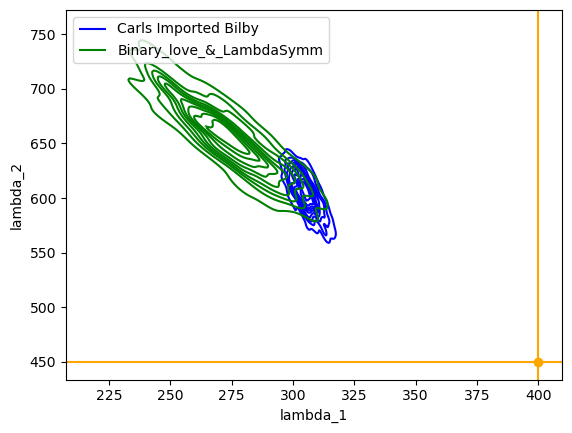

In [12]:
sns.kdeplot( x=result_1.posterior['lambda_1'], y=result_1.posterior['lambda_2'],color = 'blue', label='Carls Imported Bilby')
# sns.kdeplot( x=result_2.posterior['lambda_1'], y=result_2.posterior['lambda_2'],color = 'r', label='LambdaSymm_&_LambdaAsymm')
sns.kdeplot( x=result_3.posterior['lambda_1'], y=result_3.posterior['lambda_2'],color = 'green', label='Binary_love_&_LambdaSymm')
#lambda 2 y
plt.axhline(y=result_1.injection_parameters['lambda_2'], color="orange", linestyle="-")
#lambda 2 x
plt.axvline(x= result_1.injection_parameters['lambda_1'], color="orange")
#Add the point
plt.scatter(result_1.injection_parameters['lambda_1'], result_1.injection_parameters['lambda_2'],color = 'orange')


plt.legend()
plt.show()



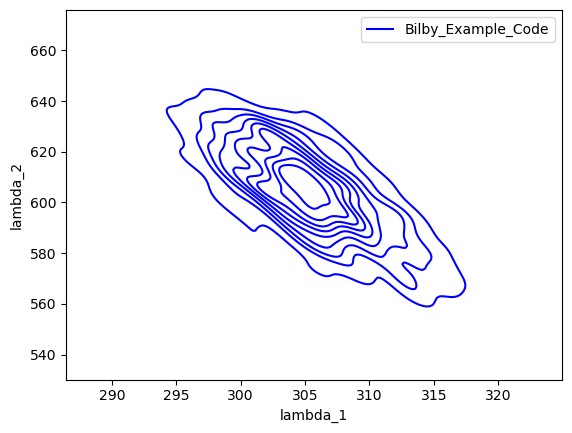

In [8]:
sns.kdeplot( x=result_1.posterior['lambda_1'], y=result_1.posterior['lambda_2'],color = 'blue', label='Bilby_Example_Code')
# sns.kdeplot( x=result_2.posterior['lambda_1'], y=result_2.posterior['lambda_2'],color = 'r', label='LambdaSymm_&_LambdaAsymm')
# sns.kdeplot( x=result_3.posterior['lambda_1'], y=result_3.posterior['lambda_2'],color = 'green', label='Binary_love_&_LambdaSymm')
plt.legend()
plt.show()

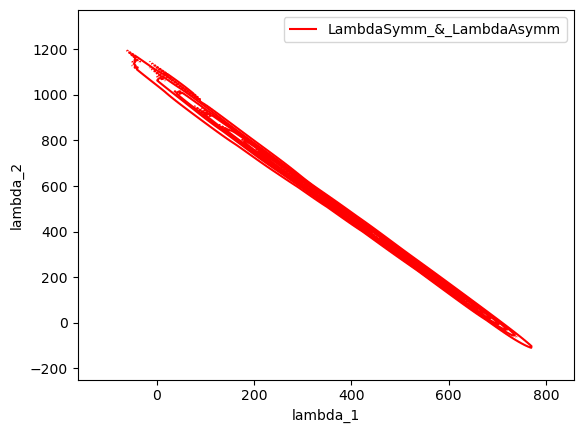

In [9]:
# sns.kdeplot( x=result_1.posterior['lambda_1'], y=result_1.posterior['lambda_2'],color = 'blue', label='Bilby_Example_Code')
sns.kdeplot( x=result_2.posterior['lambda_1'], y=result_2.posterior['lambda_2'],color = 'r', label='LambdaSymm_&_LambdaAsymm')
# sns.kdeplot( x=result_3.posterior['lambda_1'], y=result_3.posterior['lambda_2'],color = 'green', label='Binary_love_&_LambdaSymm')
plt.legend()
plt.show()